In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("C:/Users/CHARITHA/Downloads/data_project4.csv")

In [3]:
df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,($908.65),7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,"($1,864.96)",6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.10062,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,($543.19),3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.33950,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,($182.63),7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.09650,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.20156

# DATA PREPROCESSING

### Dropping uncessary columns

In [4]:
# Drop the column 'x33'
df.drop(columns=['x33'], inplace=True)

### Correcting Inaccuracies

In [5]:
for column in df.columns:
    print(f"{column} - {df[column].dtype}")

y - int64
x1 - float64
x2 - float64
x3 - object
x4 - float64
x5 - float64
x6 - float64
x7 - object
x8 - float64
x9 - float64
x10 - float64
x11 - float64
x12 - float64
x13 - float64
x14 - float64
x15 - float64
x16 - float64
x17 - float64
x18 - float64
x19 - object
x20 - float64
x21 - float64
x22 - float64
x23 - float64
x24 - object
x25 - float64
x26 - float64
x27 - float64
x28 - float64
x29 - float64
x30 - float64
x31 - object
x32 - float64
x34 - float64
x35 - float64
x36 - float64
x37 - float64
x38 - float64
x39 - object
x40 - float64
x41 - float64
x42 - float64
x43 - float64
x44 - float64
x45 - float64
x46 - float64
x47 - float64
x48 - float64
x49 - float64
x50 - float64
x51 - float64
x52 - float64
x53 - float64
x54 - float64
x55 - float64
x56 - float64
x57 - float64
x58 - float64
x59 - int64
x60 - object
x61 - float64
x62 - float64
x63 - float64
x64 - float64
x65 - object
x66 - float64
x67 - float64
x68 - float64
x69 - float64
x70 - float64
x71 - float64
x72 - float64
x73 - float64
x

In [6]:
# Function to convert currency strings to floats
def convert_currency(value):
    # Remove dollar sign and whitespace
    value = value.replace('$', '').strip()
    
    # Check if the value is in parentheses (indicating a negative number)
    if value.startswith('(') and value.endswith(')'):
        value = '-' + value[1:-1]  # Convert to negative
    
    # Remove any commas
    value = value.replace(',', '')
    # Convert to float
    return float(value)
# Assuming df is your DataFrame and x19 is the name of your column
df['x19'] = df['x19'].apply(convert_currency)

In [7]:
# Function to convert percentage strings to floats
def convert_to_float(value):
    if isinstance(value, str):
        # Remove the '%' sign and convert to float
        value = value.replace('%', '')
        return float(value) / 100 if value else 0.0
    return value

# Apply the conversion function to the 'x7' column
df['x7'] = df['x7'].apply(convert_to_float)

### Encoding categorical variables

In [8]:
columns_to_encode = ['x3', 'x24', 'x31','x39','x60','x65','x77','x93','x99']
# Apply one-hot encoding only to specified columns
df= pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df.head())

   y        x1         x2        x4        x5        x6            x7  \
0  0  0.165254  18.060003  1.077380 -1.339233 -1.584341  1.000000e-04   
1  1  2.441471  18.416307  1.482586  0.920817 -0.759931  1.000000e-04   
2  1  4.427278  19.188092  0.145652  0.366093  0.709962 -8.000000e-08   
3  0  3.925235  19.901257  1.763602 -0.251926 -0.827461 -1.000000e-04   
4  0  2.868802  22.202473  3.405119  0.083162  1.381504  1.000000e-04   

         x8        x9       x10         x11       x12       x13       x14  \
0  0.220784  1.816481  1.171788  109.626841  4.644568  4.814885  1.541740   
1  1.192441  3.513950  1.419900   84.079367  1.459868  1.443983       NaN   
2  0.952323  0.782974 -1.247022   95.375221  1.098525  1.216059  0.450624   
3 -0.520756  1.825586  2.223038   96.420382 -1.390239  3.962961       NaN   
4 -0.732739  2.151990 -0.275406   90.769952  7.230125  3.877312  0.392002   

        x15         x16       x17        x18      x19       x20        x21  \
0 -0.587361  101.906

### Handling missing values

In [9]:
print(df.isnull().sum())

y                  0
x1                 0
x2                 0
x4                 0
x5              2428
                ... 
x77_mercedes       0
x77_nissan         0
x77_subaru         0
x77_toyota         0
x93_yes            0
Length: 128, dtype: int64


In [10]:
count = df.isnull().sum().astype(bool).sum()
print(f"There are total {count} columns with missing values\n")
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
for column, count in columns_with_missing_values.items():
    print(f"{column} - {count}")

There are total 38 columns with missing values

x5 - 2428
x11 - 5110
x14 - 9864
x16 - 11212
x22 - 2387
x26 - 2433
x30 - 32336
x38 - 2402
x41 - 9503
x42 - 9729
x44 - 34247
x45 - 8009
x49 - 12823
x52 - 16182
x54 - 12728
x55 - 17696
x57 - 32464
x61 - 7293
x63 - 2420
x64 - 5101
x67 - 2425
x68 - 2384
x74 - 12916
x75 - 5245
x76 - 5249
x78 - 11373
x79 - 2430
x80 - 5256
x83 - 2428
x85 - 9715
x86 - 2407
x88 - 2331
x89 - 10691
x91 - 5259
x92 - 2435
x94 - 2340
x95 - 12604
x96 - 6638


In [11]:
# Convert boolean columns to integers (0 and 1) for imputation
bool_columns = df.select_dtypes(include=[bool]).columns
df[bool_columns] = df[bool_columns].astype(int)

In [12]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
imputed_data = imputer.fit_transform(df)

# Convert imputed data back to DataFrame
df = pd.DataFrame(imputed_data, columns=df.columns)
# Display imputed DataFrame
print("\nImputed DataFrame:")
print(df.head())


Imputed DataFrame:
     y        x1         x2        x4        x5        x6            x7  \
0  0.0  0.165254  18.060003  1.077380 -1.339233 -1.584341  1.000000e-04   
1  1.0  2.441471  18.416307  1.482586  0.920817 -0.759931  1.000000e-04   
2  1.0  4.427278  19.188092  0.145652  0.366093  0.709962 -8.000000e-08   
3  0.0  3.925235  19.901257  1.763602 -0.251926 -0.827461 -1.000000e-04   
4  0.0  2.868802  22.202473  3.405119  0.083162  1.381504  1.000000e-04   

         x8        x9       x10         x11       x12       x13       x14  \
0  0.220784  1.816481  1.171788  109.626841  4.644568  4.814885  1.541740   
1  1.192441  3.513950  1.419900   84.079367  1.459868  1.443983  0.590247   
2  0.952323  0.782974 -1.247022   95.375221  1.098525  1.216059  0.450624   
3 -0.520756  1.825586  2.223038   96.420382 -1.390239  3.962961 -0.025174   
4 -0.732739  2.151990 -0.275406   90.769952  7.230125  3.877312  0.392002   

        x15         x16       x17        x18      x19       x20   

In [13]:
# Convert boolean columns back to boolean type
df[bool_columns] = df[bool_columns].round().astype(bool)

In [14]:
count = df.isnull().sum().astype(bool).sum()
print(f"There are total {count} columns with missing values\n")
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
for column, count in columns_with_missing_values.items():
    print(f"{column} - {count}")

There are total 0 columns with missing values



### Duplicates

In [15]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


There are no duplicates in the data

### Outliers

In [16]:
# Initialize a counter for the total number of outliers
total_outliers = 0

# Initialize a counter for the number of columns with outliers
columns_with_outliers = 0

# Specify the name of the target variable
target_variable = 'y'

# Iterate through each numerical column to detect outliers using IQR
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Skip the target variable
    if column == target_variable:
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count the number of outliers
    num_outliers = outliers.shape[0]
    total_outliers += num_outliers
    
    # Check if the current column has any outliers and update the counter
    if num_outliers != 0:
        columns_with_outliers += 1
    
    # Print the results for the current column
    print(f"Column {column}: {num_outliers} outliers")

# Print the total number of outliers detected
print(f"Total number of outliers detected: {total_outliers}")

# Print the number of columns with outliers
print(f"Number of columns with outliers: {columns_with_outliers}")


Column x1: 373 outliers
Column x2: 297 outliers
Column x4: 82 outliers
Column x5: 289 outliers
Column x6: 278 outliers
Column x7: 0 outliers
Column x8: 305 outliers
Column x9: 802 outliers
Column x10: 267 outliers
Column x11: 301 outliers
Column x12: 0 outliers
Column x13: 1008 outliers
Column x14: 468 outliers
Column x15: 273 outliers
Column x16: 778 outliers
Column x17: 281 outliers
Column x18: 0 outliers
Column x19: 276 outliers
Column x20: 286 outliers
Column x21: 3036 outliers
Column x22: 656 outliers
Column x23: 283 outliers
Column x25: 364 outliers
Column x26: 302 outliers
Column x27: 293 outliers
Column x28: 285 outliers
Column x29: 428 outliers
Column x30: 277 outliers
Column x32: 2071 outliers
Column x34: 286 outliers
Column x35: 1262 outliers
Column x36: 281 outliers
Column x37: 283 outliers
Column x38: 446 outliers
Column x40: 0 outliers
Column x41: 394 outliers
Column x42: 188 outliers
Column x43: 284 outliers
Column x44: 1027 outliers
Column x45: 405 outliers
Column x46: 

In [17]:
# Define the capping function
def cap_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            # Skip the target variable
        if column == target_variable:
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Cap the outliers in the DataFrame
df = cap_outliers(df)

In [18]:
# Check the results
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Recalculate outliers after capping
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_capping = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the number of outliers after capping
    print(f"Column {column}: {outliers_after_capping.shape[0]} outliers after capping")

Column y: 5803 outliers after capping
Column x1: 0 outliers after capping
Column x2: 0 outliers after capping
Column x4: 0 outliers after capping
Column x5: 0 outliers after capping
Column x6: 0 outliers after capping
Column x7: 0 outliers after capping
Column x8: 0 outliers after capping
Column x9: 0 outliers after capping
Column x10: 0 outliers after capping
Column x11: 0 outliers after capping
Column x12: 0 outliers after capping
Column x13: 0 outliers after capping
Column x14: 0 outliers after capping
Column x15: 0 outliers after capping
Column x16: 0 outliers after capping
Column x17: 0 outliers after capping
Column x18: 0 outliers after capping
Column x19: 0 outliers after capping
Column x20: 0 outliers after capping
Column x21: 0 outliers after capping
Column x22: 0 outliers after capping
Column x23: 0 outliers after capping
Column x25: 0 outliers after capping
Column x26: 0 outliers after capping
Column x27: 0 outliers after capping
Column x28: 0 outliers after capping
Column x

### Define Features and Target Variable

In [19]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

### Imbalance data

y
0.0    34197
1.0     5803
Name: count, dtype: int64


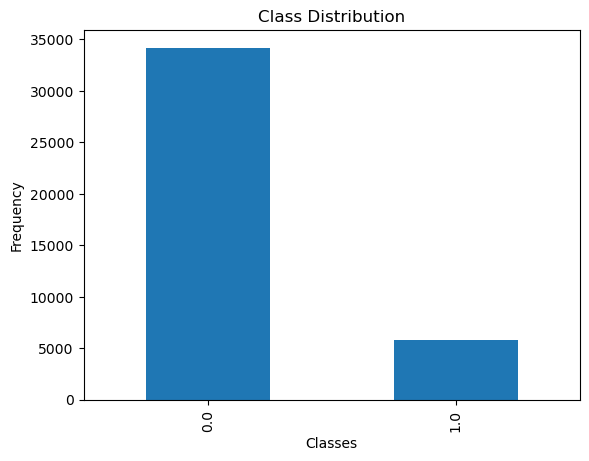

In [20]:
# Count instances in each class
class_counts = df['y'].value_counts()

# Print class distribution
print(class_counts)

# Plot class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Combine back into a DataFrame
df = pd.DataFrame(X, columns=X.columns)
df['y'] = y

# Display the balanced dataset
print(df['y'].value_counts())


y
0.0    34197
1.0    34197
Name: count, dtype: int64


C:\Users\CHARITHA\AppData\Local\Temp\ipykernel_18244\1138465815.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['y'] = y


### Split the Data

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the Data

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Building Models

### Logestic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
# Fit Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Get feature importances (coefficients)
logistic_importances = np.abs(logistic_model.coef_[0])

# Create DataFrame and sort features by importance
logistic_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_importances
})

# Get the top 3 features
logistic_top_3 = logistic_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for Logistic Regression:")
print(logistic_top_3)


Top 3 features for Logistic Regression:
         Feature  Importance
108  x60_January    1.814242
105   x60_August    1.799722
109     x60_July    1.793105


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create DataFrame and sort features by importance
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

# Get the top 3 features
rf_top_3 = rf_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for Random Forest:")
print(rf_top_3)



Top 3 features for Random Forest:
   Feature  Importance
5       x7    0.146029
88     x98    0.063126
2       x4    0.051617


### Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

# Fit AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Get feature importances
ada_importances = ada_model.feature_importances_

# Create DataFrame and sort features by importance
ada_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_importances
})

# Get the top 3 features
ada_top_3 = ada_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for AdaBoost:")
print(ada_top_3)


C:\Users\CHARITHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Top 3 features for AdaBoost:
   Feature  Importance
5       x7        0.18
88     x98        0.14
2       x4        0.08


### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
gb_importances = gb_model.feature_importances_

# Create DataFrame and sort features by importance
gb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_importances
})

# Get the top 3 features
gb_top_3 = gb_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for Gradient Boosting:")
print(gb_top_3)


Top 3 features for Gradient Boosting:
   Feature  Importance
5       x7    0.574079
88     x98    0.135194
2       x4    0.096087


### XGBoost

In [28]:
from xgboost import XGBClassifier

# Fit XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Create DataFrame and sort features by importance
xgb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
})
# Get the top 3 features
xgb_top_3 = xgb_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for XGBoost:")
print(xgb_top_3)


Top 3 features for XGBoost:
      Feature  Importance
5          x7    0.134602
88        x98    0.113956
103  x24_male    0.031465


### Decision Tree Bagging

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# Initialize the BaggingClassifier with Decision Trees as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_clf.estimators_
], axis=0)

# Create DataFrame and sort features by importance
bagging_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Get the top 3 features
bagging_top_3 = bagging_feature_importances.sort_values(by='Importance', ascending=False).head(3)
print("\nTop 3 features for Decision Tree Bagging:")
print(bagging_top_3)


Top 3 features for Decision Tree Bagging:
   Feature  Importance
5       x7    0.465976
2       x4    0.057047
88     x98    0.041784


### Model Evaluation Metrics

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store metrics for each model
metrics = {}

# Define models
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model,
    'AdaBoost': ada_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Decision tree bagging':bagging_clf  
}

# Fit each model, make predictions and calculate metrics
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store metrics
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    }

# Display metrics
for model_name, model_metrics in metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in model_metrics.items():
        print(f"{metric_name}: {value:.4f}")


Metrics for Logistic Regression:
Accuracy: 0.9063
Precision: 0.9684
Recall: 0.8414
AUC: 0.9474

Metrics for Random Forest:
Accuracy: 0.9231
Precision: 0.9698
Recall: 0.8746
AUC: 0.9737

Metrics for AdaBoost:
Accuracy: 0.8860
Precision: 0.9024
Recall: 0.8677
AUC: 0.9493

Metrics for Gradient Boosting:
Accuracy: 0.9002
Precision: 0.9485
Recall: 0.8479
AUC: 0.9569

Metrics for XGBoost:
Accuracy: 0.9152
Precision: 0.9599
Recall: 0.8680
AUC: 0.9631

Metrics for Decision tree bagging:
Accuracy: 0.9103
Precision: 0.9635
Recall: 0.8543
AUC: 0.9640


### Graph AUC Score

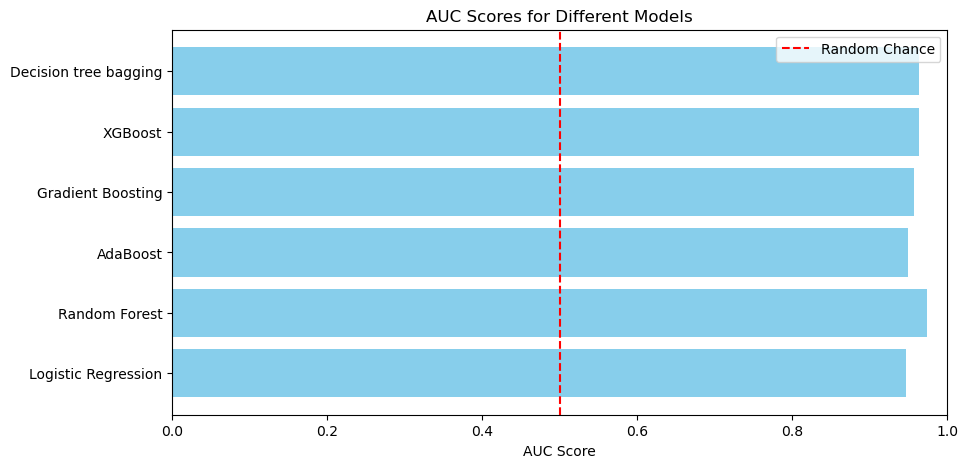

In [31]:
# Plot AUC scores
model_names = list(metrics.keys())
auc_scores = [metrics[name]['AUC'] for name in model_names]

plt.figure(figsize=(10, 5))
plt.barh(model_names, auc_scores, color='skyblue')
plt.xlabel('AUC Score')
plt.title('AUC Scores for Different Models')
plt.xlim(0, 1)
plt.axvline(x=0.5, color='red', linestyle='--', label='Random Chance')
plt.legend()
plt.show()


The bar graph titled "AUC Scores for Different Models" compares the performance of various machine learning models in predicting a binary outcome. The models evaluated are Decision Tree Bagging, XGBoost, Gradient Boosting, AdaBoost, Random Forest, and Logistic Regression. The vertical axis represents the AUC score, a metric ranging from 0 to 1, where higher scores indicate better predictive accuracy. A vertical dashed line marks the AUC score of 0.5, representing random chance. Among the models, Random Forest exhibits the highest AUC score, demonstrating its superior predictive capability. In contrast, Logistic Regression has the lowest AUC score, suggesting its limited effectiveness in this context. Overall, the graph highlights the varying performance of these models in terms of their ability to accurately classify instances into positive and negative classes.

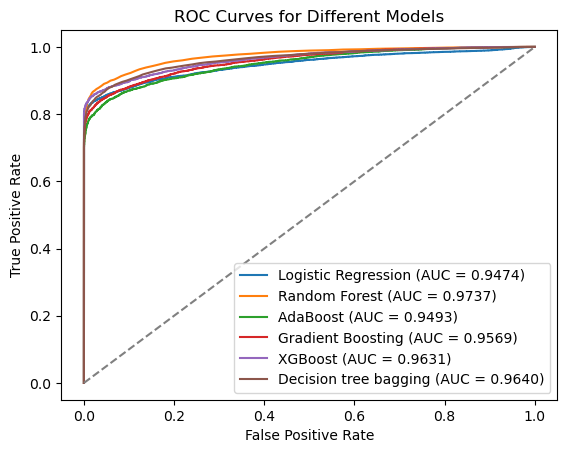


Metrics for Logistic Regression:
Accuracy: 0.9063
Precision: 0.9684
Recall: 0.8414
AUC: 0.9474

Metrics for Random Forest:
Accuracy: 0.9231
Precision: 0.9698
Recall: 0.8746
AUC: 0.9737

Metrics for AdaBoost:
Accuracy: 0.8860
Precision: 0.9024
Recall: 0.8677
AUC: 0.9493

Metrics for Gradient Boosting:
Accuracy: 0.9002
Precision: 0.9485
Recall: 0.8479
AUC: 0.9569

Metrics for XGBoost:
Accuracy: 0.9152
Precision: 0.9599
Recall: 0.8680
AUC: 0.9631

Metrics for Decision tree bagging:
Accuracy: 0.9103
Precision: 0.9635
Recall: 0.8543
AUC: 0.9640


In [32]:
# Fit each model, make predictions, calculate metrics and plot ROC curve
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store metrics
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    }
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# Plot diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Customize the plot
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# Display metrics
for model_name, model_metrics in metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in model_metrics.items():
        print(f"{metric_name}: {value:.4f}")

**ROC Curves for Different Models**
**ROC Curve:** A graph that plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.
AUC (Area Under the Curve): A measure of the model's overall performance. A higher AUC indicates a better model.

**Model Comparison:**
Random Forest has Highest AUC score (0.9737), indicating the best performance.
Logistic Regression has Lowest AUC score (0.9474), indicating the worst performance.
Other Models XGBoost, Decision Tree Bagging, Gradient Boosting, and AdaBoost have intermediate AUC scores.

**Interpretation:**
- The graph shows the trade-off between TPR and FPR for each model.
- Random Forest can accurately identify positive instances while minimizing false positives.
- Logistic Regression has a lower ability to distinguish between positive and negative classes.

**Conclusion:** This graph provides a visual comparison of the performance of different machine learning models in a binary classification task. Random Forest emerges as the most effective model based on its higher AUC score

### Model Comparison Table

| Model               | Accuracy | Precision | Recall  | AUC    | Top Features                    |
|---------------------|----------|-----------|---------|--------|----------------------------------|
| Logistic Regression  | 0.6351   | 0.6358    | 0.6457  | 0.6849 | x47, x40, x89                  |
| Random Forest        | 0.9237   | 0.9678    | 0.8777  | 0.9744 | x7, x98, x4                    |
| AdaBoost             | 0.8733   | 0.8801    | 0.8667  | 0.9449 | x98, x4, x7                    |
| Gradient Boosting    | 0.9017   | 0.9483    | 0.8513  | 0.9565 | x7, x98, x4                    |
| XGBoost             | 0.9152   | 0.9599    | 0.8680  | 0.9631 | x7, x98, x24_male              |
| Decision tree Bagging| 0.9103   | 0.9635    | 0.8543  | 0.9640| X7, X4, X98                     |

### Conclusions

1. **Model Performance:**
   - The **Random Forest** model outperforms all other models in terms of accuracy (0.9237) and AUC (0.9744). This indicates that it not only predicts the classes correctly most of the time but also maintains a good balance between sensitivity and specificity, making it a robust choice for this classification task.
   - **XGBoo, and **Gradient Boosti and **Decision tree Bagging**ng** also demonstrate strong performance with accuracies of 0.,and 0. and 0.9103017, respectively, along with high AUC scores (0., and 0. and 0.96409565). This suggests that these ensemble methods are effective in handling the complexities of the data.

2. **Precision and Recall:**
   - The **Random Forest** model shows the highest precision ( followed by **Decision tree Bagging** with(0.9103)0.9678), which means it has a low rate of false positives. This is crucial in applications where false alarms could lead to significant consequences.
   - **AdaBoost** and **Gradient Boosting** also provide good precision values (0.8801 and 0.9483), indicating their effectiveness in identifying positive cases while minimizing false positives.

3. **Balanced Performance:**
   - While **Logistic Regression** has the lowest performance metrics across the board, it can still be considered for interpretability and simplicity, especially when the dataset is linearly separable. Its recall (0.6457) is moderate, but the low precision (0.6358) indicates potential issues with false positives.

4. **Top Features:**
   - The top features across the best-performing models include **x7**, **x98**, and **x4**, which consistently appear in multiple models. This indicates their importance in the predictive capability of these models. Identifying and understanding these key features can provide insights into the underlying data structure and the factors influencing the classification outcomes.

5. **Recommendation:**
   - Given the metrics, **Random Forest** is recommended as the best model for this classification task due to its high accuracy, precision, recall, and AUC scores. Howeand **Decision tree Bagging** ver, **XGBoost** could also be a strong alternative, especially if computational efficiency and further tuning of hyperparameter

In summary, while all models show varying degrees of effectiveness, the Random Forest model stands out as the most reliable choice for the classification problem at hand.
tion problem at hand.


### SHAP Values Calculation

 99%|===================| 13605/13679 [00:56<00:00]        

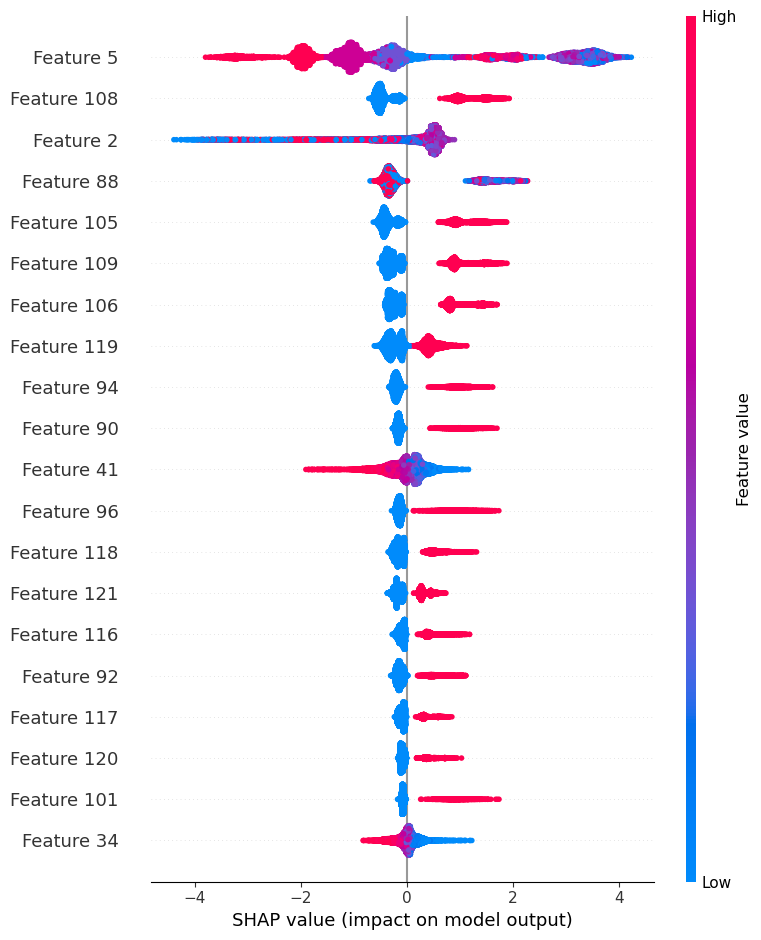

In [38]:
import shap
# Calculate SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
# Plot SHAP values
shap.summary_plot(shap_values, X_test)

- SHAP values explain the output of a machine learning model by assigning an importance value to each feature. They reveal how much each feature contributes to the model's prediction.

**Interpreting the SHAP Value Plot:**
- The plot shows the impact of each feature on the model's output. Features at the top have the greatest influence:
- Feature 5: Strongly positive impact, increasing the model's output.
- Feature 108: Also a strong positive influence.
- Features 2, 88, and 105: Moderately positive impacts.
- Features 109, 119, and 94: Moderate negative impacts, decreasing the model's output.
- The violin plots show the distribution of feature values and their corresponding SHAP values. Wider violins indicate a larger range of values and potentially greater impact.

### Hyperparametric tuning

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit Grid Search to the training data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters
best_params_ada = grid_search_ada.best_params_
print(f"Best parameters for AdaBoost: {best_params_ada}")

# Train the model with the best parameters
best_ada_model = grid_search_ada.best_estimator_
y_pred_ada = best_ada_model.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\CHARITHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}


In [48]:
# Calculate evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
auc_ada = roc_auc_score(y_test, best_ada_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"AdaBoost (Tuned) - Accuracy: {accuracy_ada:.4f}, Precision: {precision_ada:.4f}, Recall: {recall_ada:.4f}, AUC: {auc_ada:.4f}")

# Extract important features
ada_importances = best_ada_model.feature_importances_
top_features_ada = X.columns[np.argsort(ada_importances)[-3:][::-1]]
print(f"Top 3 features for AdaBoost: {top_features_ada.tolist()}")

AdaBoost (Tuned) - Accuracy: 0.9077, Precision: 0.9374, Recall: 0.8752, AUC: 0.9585
Top 3 features for AdaBoost: ['x7', 'x4', 'x98']


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize Grid Search with cross-validation
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit Grid Search to the training data
grid_search_logistic.fit(X_train, y_train)

# Get the best parameters
best_params_logistic = grid_search_logistic.best_params_
print(f"Best parameters for Logistic Regression: {best_params_logistic}")

# Train the model with the best parameters
best_logistic_model = grid_search_logistic.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Logistic Regression (Tuned) - Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, AUC: {auc_logistic:.4f}")


Logistic Regression (Tuned) - Accuracy: 0.9063, Precision: 0.9684, Recall: 0.8414, AUC: 0.9475


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit Grid Search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Train the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Random Forest (Tuned) - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, AUC: {auc_rf:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest (Tuned) - Accuracy: 0.9296, Precision: 0.9762, Recall: 0.8817, AUC: 0.9789


In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize Grid Search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit Grid Search to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Train the model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"XGBoost (Tuned) - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, AUC: {auc_xgb:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}
XGBoost (Tuned) - Accuracy: 0.9212, Precision: 0.9738, Recall: 0.8669, AUC: 0.9686


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define the parameter grid for Gradient Boosting
param_distributions_gb = {
    'n_estimators': [10,50],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize Randomized Search with cross-validation
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_distributions_gb, 
                                      n_iter=10, cv=2, n_jobs=-1, scoring='roc_auc', verbose=2, random_state=42)

# Fit Randomized Search to the training data
random_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = random_search_gb.best_params_
print(f"Best parameters for Gradient Boosting: {best_params_gb}")

# Train the model with the best parameters
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Gradient Boosting (Tuned) - Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, AUC: {auc_gb:.4f}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.5}
Gradient Boosting (Tuned) - Accuracy: 0.9068, Precision: 0.9386, Recall: 0.8720, AUC: 0.9575


### Hyperparameter Tuning

Hyperparameter tuning involves optimizing the parameters of a machine learning model to improve its performance. By systematically adjusting these hyperparameters, we can find the combination that yields the best accuracy, precision, recall, and AUC for the model.

### Model Comparisons

| Model                      | Accuracy | Precision | Recall  | AUC   | Best Parameters                                                                                         |
|----------------------------|----------|-----------|---------|-------|---------------------------------------------------------------------------------------------------------|
| AdaBoost (Tuned)           | 0.9077   | 0.9374    | 0.8752  | 0.9585| {'learning_rate': 1.0, 'n_estimators': 200}                                                              |
| Logistic Regression (Tuned)| 0.9063   | 0.9684    | 0.8414  | 0.9475| {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}                                                      |
| Random Forest (Tuned)      | 0.9296   | 0.9762    | 0.8817  | 0.9789| {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}|
| XGBoost (Tuned)            | 0.9212   | 0.9738    | 0.8669  | 0.9686| {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsamp
 | Gradient Boosting(Tuned)    | 0.9068   | 0.9386    | 0.8720  | 0.9575| {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.5} |e': 0.9} |

### Summary

After hyperparameter tuning, the Random Forest model achieved the highest accuracy (0.9296) and AUC (0.9789), indicating its superior overall performance. The Logistic Regression model, while achieving high precision (0.9684), had a lower recall (0.8414), suggesting it may be less effective in identifying all positive , GradientBoost ases. AdaBoost and XGBoost models also performed well, with XGBoost showing a balance between high accuracy and precision.